<a href="https://colab.research.google.com/github/thanh-huy/SIC_Excercies/blob/main/Chapter5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thực hành học máy với bộ dữ liệu iris
- Phân tích dữ liệu
- Vẽ biểu đồ trực quan với Pyplot và Seaborn
- Xử lý dữ liệu
- Chọn mô hình huấn luyện

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()
print(data.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Tiền xử lý dữ liệu với Pandas và Numpy

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
iris = pd.DataFrame(data = data.data, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
feature = pd.DataFrame(data.data, columns=data.feature_names)
data.target
target = pd.DataFrame(data.target, columns=['species'])
target.head()

,species
0,0
1,0
2,0
3,0
4,0


Merge features và target thành 1 DataFrame và đổi tên fetures rút gọn

In [7]:
iris= pd.concat([feature, target], axis=1)
iris.rename(columns={'sepal length (cm)':'sepal_length', 'sepal width (cm)':'sepal_width', 'petal length (cm)':'pental_length', 'petal width (cm)':'pental_width'}, inplace=True)
iris.columns

Index(['sepal_length', 'sepal_width', 'pental_length', 'pental_width',
       'species'],
      dtype='object')

In [8]:
iris['species'] = iris.species.map(lambda x:data.target_names[x])
iris.head()

,sepal_length,sepal_width,pental_length,pental_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Kiểm tra và xử lý các giá trị thiếu

In [9]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
pental_length,0
pental_width,0
species,0


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   pental_length  150 non-null    float64
 3   pental_width   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.describe()

,sepal_length,sepal_width,pental_length,pental_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.drop('species', axis=1).corr()

,sepal_length,sepal_width,pental_length,pental_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
pental_length,0.871754,-0.428440,1.000000,0.962865
pental_width,0.817941,-0.366126,0.962865,1.000000


In [18]:
iris.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50


Trực quan hóa dữ liệu

In [27]:
def boxplot_iris(feature_names,dataset):
  i = 1
  plt.figure(figsize=(11,9))
  for col in feature_names:
    ax = plt.subplot(2,2,i)
    ax.axis('on')
    ax.tick_params(axis='both', left=True,
                    top = False, right = False,
                    bottom=True, labelleft= False,
                    labeltop = False, labelright = False,
                    labelbottom = False)
    dataset[col].plot(kind='box',ax = ax, sharex = False)
    ax.set_title(col)
    i+=1
  plt.show()

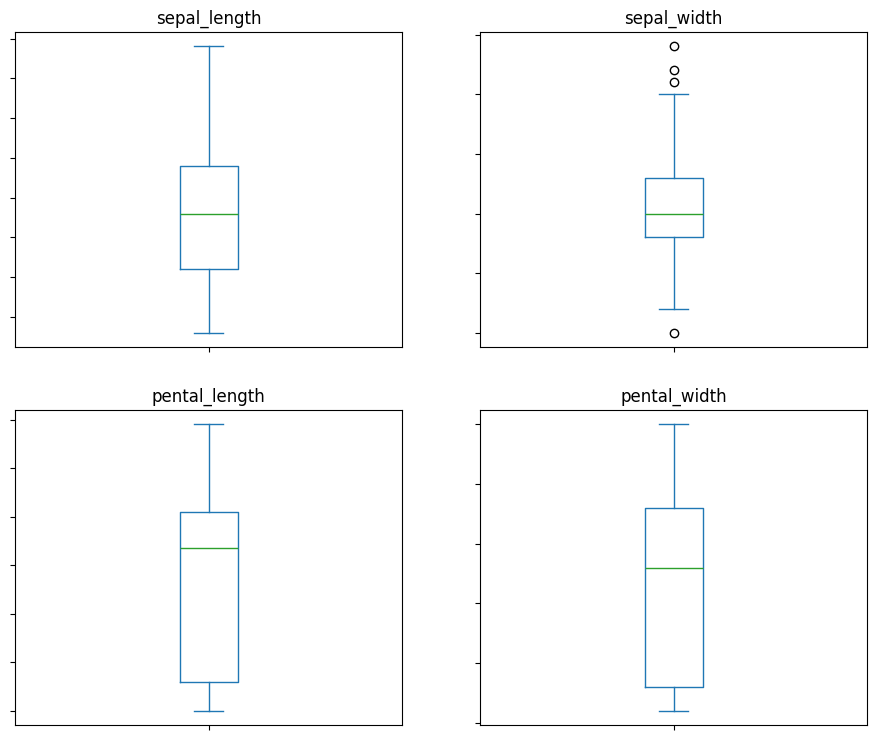

In [29]:
boxplot_iris(iris.columns[:-1],iris)

Trực quan hóa phân phối dữ liệu

In [31]:
def histogram_iris(feature_names,dataset):
  i=1
  plt.figure(figsize=(11,9))
  for col in feature_names:
    ax = plt.subplot(2,2,i)
    ax.axis('on')
    ax.tick_params(axis='both', left=True,
                   top = False, right=False,
                   bottom=True, labelleft=False,
                   labeltop=False, labelright=False,
                   labelbottom=False)
    dataset[col].hist()
    ax.set_title(col)
    i+=1
  plt.show()

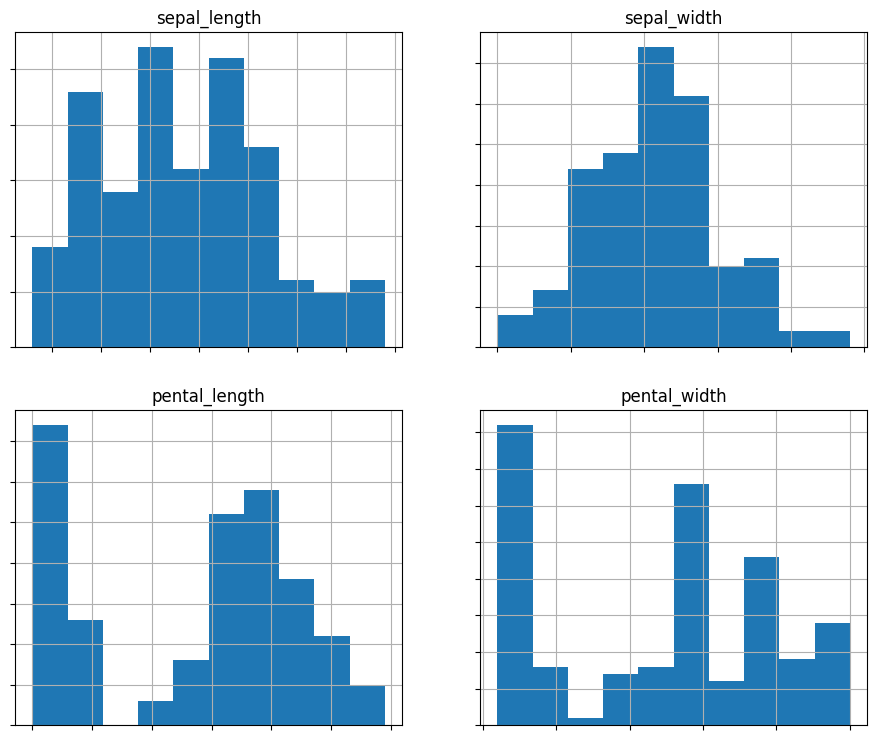

In [32]:
histogram_iris(iris.columns[:-1],iris)

               sepal_length  sepal_width  pental_length  pental_width
sepal_length       1.000000    -0.117570       0.871754      0.817941
sepal_width       -0.117570     1.000000      -0.428440     -0.366126
pental_length      0.871754    -0.428440       1.000000      0.962865
pental_width       0.817941    -0.366126       0.962865      1.000000


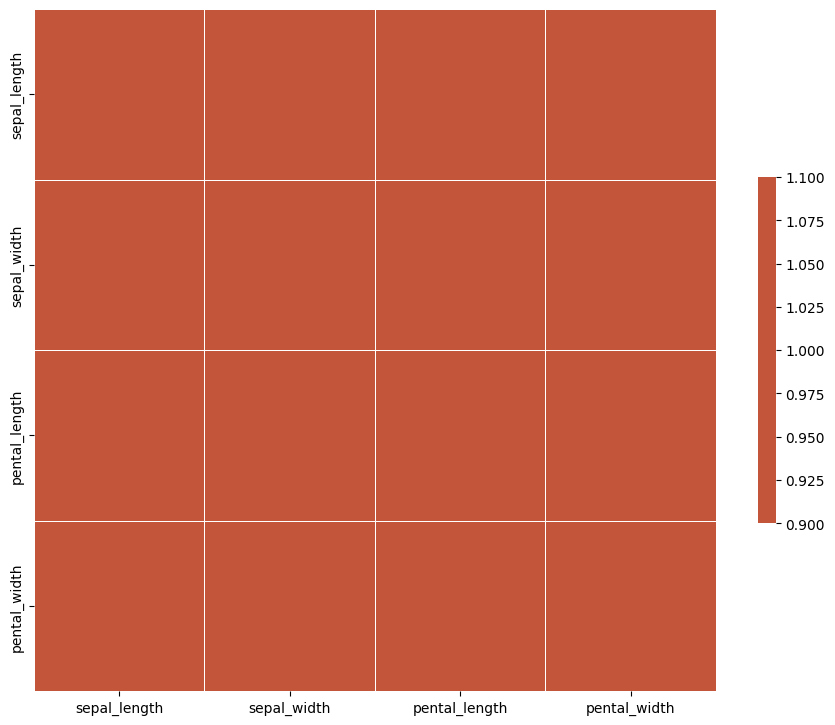

In [38]:
corr = iris.drop('species', axis=1).corr()
print(corr)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr,cmap=cmap,vmax=1.0,vmin=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

[]

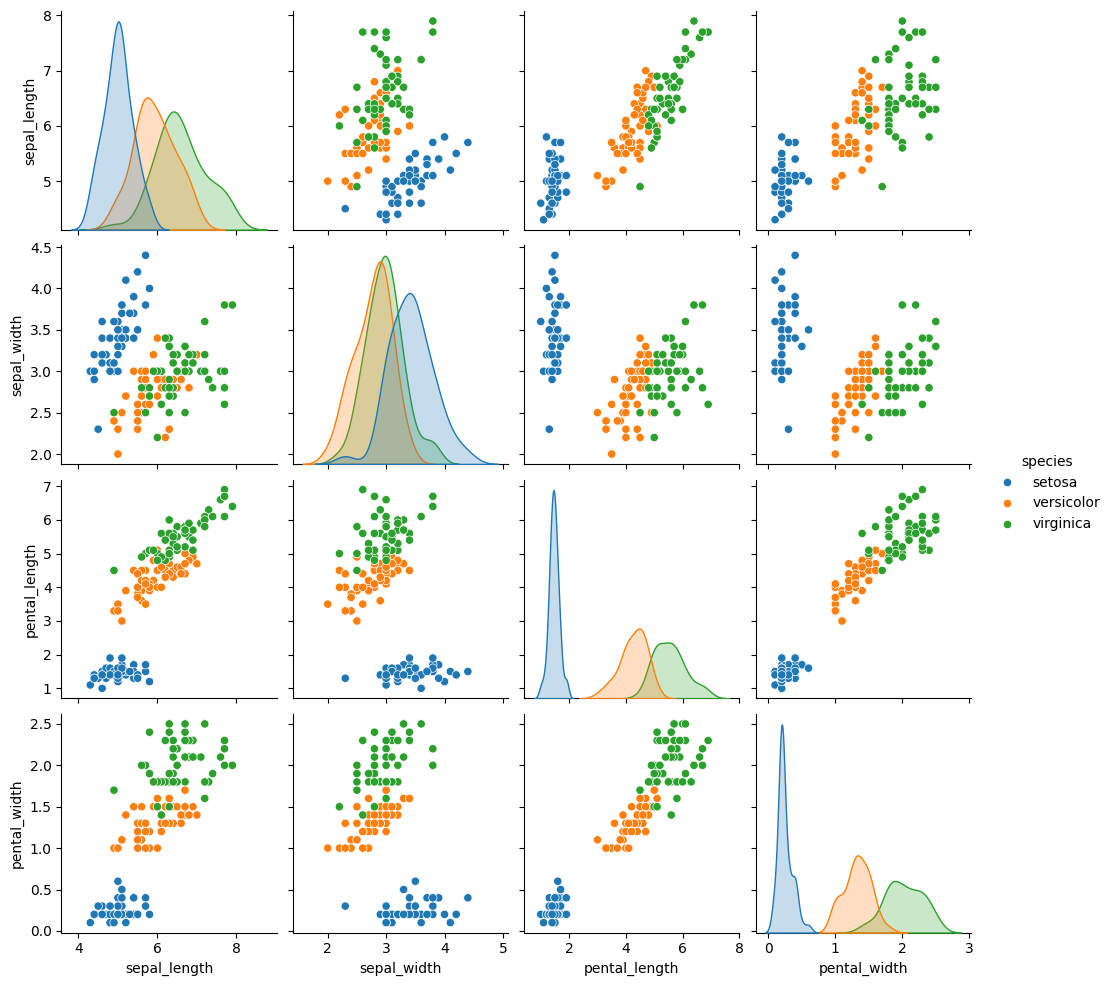

In [39]:
sns.pairplot(iris, hue='species')
plt.plot()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1), iris.species, test_size=0.3, random_state=42)


Huấn luyện với DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                               max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None) # Removed min_impurity_split
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [47]:
model.score(X_test, y_test)

1.0

In [48]:
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model, iris.drop('species', axis=1), iris.species, cv=cv)
final_res = np.mean(scores)
print(final_res)

0.9400000000000001


In [51]:
for i, _ in enumerate(scores):
  print(f'Fold {i+1}: {scores[i]}')

Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.9333333333333333
Fold 5: 0.9333333333333333
Fold 6: 0.8666666666666667
Fold 7: 0.8666666666666667
Fold 8: 1.0
Fold 9: 0.8666666666666667
Fold 10: 0.9333333333333333
